In [409]:
from Bio import Entrez

In [410]:
Entrez.email = "blackholekun@gmail.com"

In [411]:
handle = Entrez.esearch(db="pubmed", term="biotin[title]", retmax="40")

In [412]:
record = Entrez.read(handle)

In [413]:
print(record['IdList'])

['34767485', '34767332', '34736903', '34736902', '34726340', '34722825', '34710551', '34709266', '34708839', '34699867', '34694917', '34674283', '34662931', '34631424', '34623451', '34599078', '34597430', '34591470', '34578310', '34573713', '34569577', '34561940', '34559243', '34546713', '34535941', '34516894', '34486596', '34470995', '34454766', '34425888', '34410115', '34378342', '34364483', '34364458', '34354679', '34346119', '34332461', '34294999', '34278138', '34262533']


In [414]:
IdList=list(record['IdList'])

In [415]:
title=[]
for i in range(len(IdList)): 
    handle = Entrez.esummary(db="pubmed", id=IdList[i], retmode="xml")
    records = Entrez.parse(handle)  
    for record in records:
        title.append(record['Title'])    
title=''.join(title)  
# Notes: 무지하게 오래 걸린다. 실화다. (retmax와 소요시간이 미칠듯이 비례함)

In [416]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plot

In [417]:
from PIL import Image
import numpy as np

In [418]:
image=np.array(Image.open("/home/koreanraichu/600px-025Pikachu.png"))

In [419]:
font_path = '/usr/share/fonts/Kyobo Handwriting 2019.ttf'
wordcloud = WordCloud(font_path = font_path,
                      background_color="#ffffff",colormap="Spectral",width = 800, height=800,
                      mask=image)

In [420]:
wordcloud = wordcloud.generate_from_text(title)

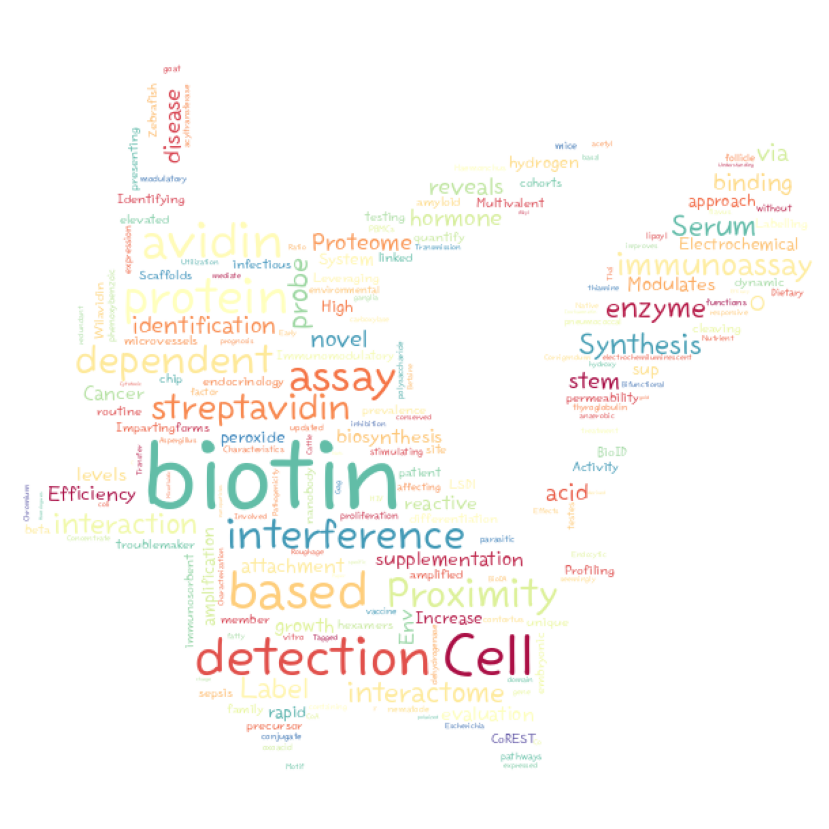

In [421]:
plot.figure(figsize=(15,15))
plot.axis('off')
plot.imshow(wordcloud)
plot.show()

In [408]:
print(len(IdList))

2


{'Item': [], 'Id': '23104303', 'PubDate': '2013 Oct', 'EPubDate': '2012 Oct 27', 'Source': 'Bioprocess Biosyst Eng', 'AuthorList': ['Gustavsson R', 'Mandenius CF'], 'LastAuthor': 'Mandenius CF', 'Title': 'Soft sensor control of metabolic fluxes in a recombinant Escherichia coli fed-batch cultivation producing green fluorescence protein.', 'Volume': '36', 'Issue': '10', 'Pages': '1375-84', 'LangList': ['English'], 'NlmUniqueID': '101088505', 'ISSN': '1615-7591', 'ESSN': '1615-7605', 'PubTypeList': ['Journal Article'], 'RecordStatus': 'PubMed - indexed for MEDLINE', 'PubStatus': 'ppublish+epublish', 'ArticleIds': {'pubmed': ['23104303'], 'medline': [], 'doi': '10.1007/s00449-012-0840-z', 'rid': '23104303', 'eid': '23104303'}, 'DOI': '10.1007/s00449-012-0840-z', 'History': {'pubmed': ['2012/10/30 06:00'], 'medline': ['2014/04/02 06:00'], 'received': '2012/03/26 00:00', 'accepted': '2012/10/10 00:00', 'entrez': '2012/10/30 06:00'}, 'References': [], 'HasAbstract': IntegerElement(1, attribu